In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/text-reason/evaluation.xlsx
/kaggle/input/text-reason/train.xlsx


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

In [3]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q
    

In [45]:
# df = pd.read_excel("/kaggle/input/text-reason/train.xlsx")
df = pd.read_excel("/kaggle/input/text-reason/evaluation.xlsx")

In [46]:
df.reason = df.reason.apply(preprocess)
df.text = df.text.apply(preprocess)

In [35]:
! pip install nlpaug -q

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [36]:
import nlpaug
import nlpaug.augmenter.word as naw

aug = naw.SynonymAug(aug_src='wordnet',aug_max=4)
aug2 = naw.AntonymAug()

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


In [37]:
antonmy = []
y = []

for i in range(len(df)) :
    temp = []
    temp.append(df.text.iloc[i])
    temp.append(aug2.augment(df.reason.iloc[i])[0])
    antonmy.append(temp)
    y.append(0)
    
for i in range(len(df)) :
    temp = []
    temp.append(aug2.augment(df.text.iloc[i])[0])
    temp.append(df.reason.iloc[i])
    antonmy.append(temp)
    y.append(0)
    
for i in range(len(df)) :
    temp = []
    temp.append(aug.augment(df.text.iloc[i])[0])
    temp.append(df.reason.iloc[i])
    antonmy.append(temp)
    y.append(1)
    
antonmy = np.array(antonmy)
y = np.array(y)
print(antonmy.shape, y.shape)

(6183, 2) (6183,)


In [38]:
new = pd.DataFrame(antonmy, columns=['text','reason'])
new['label'] = y

temp = pd.concat([df, new], axis=0)
df = temp.sample(frac=1).reset_index(drop=True)

df

,text,reason,label
0,use rapid climb for online class is super conv...,using zoom for online classes is good,1.0
1,the new mobile update be frightful,mobile update was bad,1.0
2,i am tire of walter elias disney,disney plus is bad,1.0
3,iodin utterly make out this app but on that po...,missing some episodes and seasons,1.0
4,the absolute worst tv app out here,worst app to watch movies and series,1.0
...,...,...,...
8239,very reliable means of face to face communication,evil for face to avoid communication,0.0
8240,cannot share ppt on my phone,want to share ppt on phone,1.0
8241,after opening the app it freezes and closes a...,app freezes automatically and closes,1.0
8242,i really like the function of switching the se...,switching the session between devices,1.0


In [6]:
df.columns

Index(['text', 'reason', 'label'], dtype='object')

In [7]:
df

,text,reason,label
0,the app is crashing when i play a vedio,app crashes during playback,1.0
1,but i want to connect it to the tv from one de...,want compatibility with more smart televisions,0.0
2,very helpful when and home working remotley,good app for work,0.0
3,this zoom so called and missed call and mobile...,receiving incorrect phone number message,0.0
4,one of my favorite apps,good for spending time,0.0
...,...,...,...
8995,very good streaming platform has a lot of content,app has very good content,1.0
8996,so paying for an app that is not fit for purpose,unable to use app,0.0
8997,it does not work well for me it loads but if...,app keeps loading indefinitely,0.0
8998,i can not watch the new disney shows,unable to load the episodes list,0.0


In [9]:
! pip install transformers

In [10]:
from transformers import AutoTokenizer,TFBertModel
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
bert_1 = TFBertModel.from_pretrained('bert-base-cased')
bert_2 = TFBertModel.from_pretrained('bert-base-cased')
bert = TFBertModel.from_pretrained('bert-base-cased')

2022-12-31 06:41:23.519759: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-31 06:41:23.520814: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-31 06:41:23.521494: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-31 06:41:23.523433: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/502M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initiali

In [11]:
mlen = 120

In [47]:
text = tokenizer(
    text=df.text.tolist(),
    max_length=mlen,
    add_special_tokens=True,
    truncation=True,
    padding='max_length', 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

reason = tokenizer(
    text=df.reason.tolist(),
    max_length=mlen,
    add_special_tokens=True,
    truncation=True,
    padding='max_length', 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

In [13]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense

In [14]:
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [15]:
text.attention_mask

<tf.Tensor: shape=(9000, 120), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>

In [16]:
reason.input_ids

<tf.Tensor: shape=(9000, 120), dtype=int32, numpy=
array([[  101, 12647, 21110, ...,     0,     0,     0],
       [  101,  1328, 25400, ...,     0,     0,     0],
       [  101,  1363, 12647, ...,     0,     0,     0],
       ...,
       [  101, 12647,  7634, ...,     0,     0,     0],
       [  101,  3372,  1106, ...,     0,     0,     0],
       [  101,  2033, 17641, ...,     0,     0,     0]], dtype=int32)>

In [17]:
optimizer = Adam(
    learning_rate=5e-05, # this learning rate is for bert model , taken from huggingface website 
    epsilon=1e-08,
    decay=0.01,
    clipnorm=1.0)

# Set loss and metrics
loss = tf.keras.metrics.BinaryCrossentropy()
metric = tf.keras.metrics.BinaryAccuracy()

In [18]:
text_size = 120
reason_size = 120

text_input = tf.keras.layers.Input(shape=(text_size,), dtype=tf.int32, name='text_input')
text_mask = tf.keras.layers.Input(shape=(text_size,), dtype=tf.int32, name='text_mask')

reason_input = tf.keras.layers.Input(shape=(reason_size,), dtype=tf.int32, name='reason_input')
reason_mask = tf.keras.layers.Input(shape=(reason_size,), dtype=tf.int32, name='reason_mask')

text_embeddings = bert_1(text_input, attention_mask=text_mask)[0]
reason_embeddings = bert_2(reason_input, attention_mask=reason_mask)[0]

combine_embeddings = tf.keras.layers.Concatenate()([text_embeddings, reason_embeddings])

out = tf.keras.layers.GlobalMaxPool1D(name='pooling')(combine_embeddings)
out = Dense(128, activation='relu')(out)
out = tf.keras.layers.Dropout(0.1)(out)
out = Dense(32,activation = 'relu')(out)

y = Dense(1,activation = 'sigmoid')(out)

In [19]:
model_pooling = tf.keras.Model(inputs=[text_input, text_mask, reason_input, reason_mask], outputs=y)

model_pooling.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy', 
    metrics = 'binary_accuracy')

In [20]:
text_size = mlen
reason_size = mlen

text_input = tf.keras.layers.Input(shape=(text_size,), dtype=tf.int32, name='text_input')
text_mask = tf.keras.layers.Input(shape=(text_size,), dtype=tf.int32, name='text_mask')

reason_input = tf.keras.layers.Input(shape=(reason_size,), dtype=tf.int32, name='reason_input')
reason_mask = tf.keras.layers.Input(shape=(reason_size,), dtype=tf.int32, name='reason_mask')

text_embeddings = bert_1(text_input, attention_mask=text_mask)[1]
reason_embeddings = bert_2(reason_input, attention_mask=reason_mask)[1]

combine_embeddings = tf.keras.layers.Concatenate()([text_embeddings, reason_embeddings])

# out = tf.keras.layers.GlobalMaxPool1D(name='pooling')(combine_embeddings)
# out = Dense(768, activation='relu')(combine_embeddings)
# out = tf.keras.layers.Dropout(0.1)(out)
out = Dense(32,activation = 'relu')(combine_embeddings)

y = Dense(1,activation = 'sigmoid')(out)

In [21]:
model = tf.keras.Model(inputs=[text_input, text_mask, reason_input, reason_mask], outputs=y)

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy', 
    metrics = 'binary_accuracy')

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


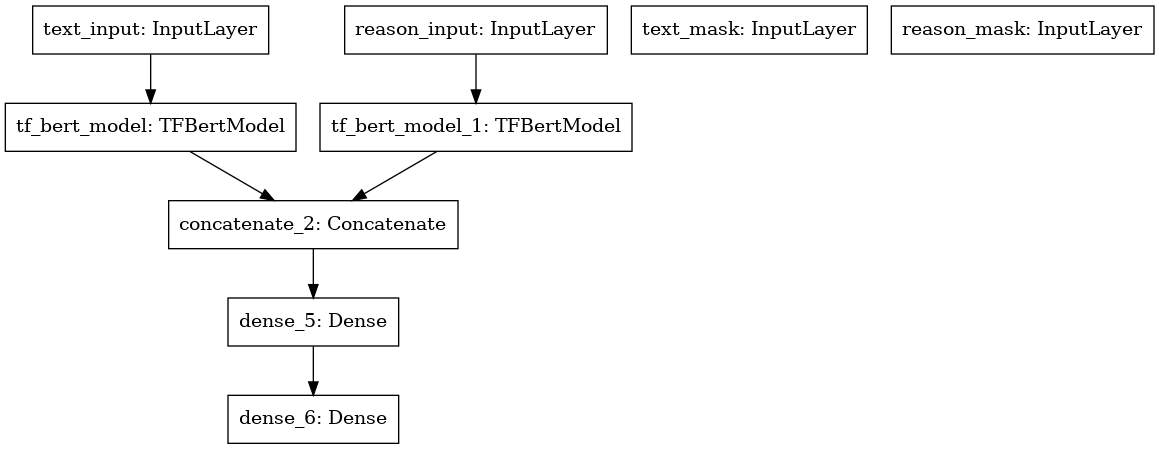

In [33]:
tf.keras.utils.plot_model(model)

In [26]:
output = []

for i in df.label :
    output.append(int(i))

In [27]:
text.input_ids.shape

TensorShape([9000, 120])

In [28]:
reason.attention_mask.shape

TensorShape([9000, 120])

In [29]:
output = np.array(output)

In [30]:
output.shape

(9000,)

In [39]:
model.fit([text.input_ids, text.attention_mask, reason.input_ids, reason.attention_mask], output , epochs=6, batch_size=32,
         callbacks=[tf.keras.callbacks.EarlyStopping(monitor='binary_accuracy', patience=1)])

Epoch 1/6
282/282 [==============================] - 249s 883ms/step - loss: 0.6387 - binary_accuracy: 0.6666
Epoch 2/6
282/282 [==============================] - 249s 883ms/step - loss: 0.6379 - binary_accuracy: 0.6666
Epoch 3/6
282/282 [==============================] - 249s 882ms/step - loss: 0.6375 - binary_accuracy: 0.6666
Epoch 4/6
282/282 [==============================] - 249s 883ms/step - loss: 0.6377 - binary_accuracy: 0.6666


In [51]:
df.label.value_counts()

0.0    5999
1.0    3001
Name: label, dtype: int64

In [48]:
y = model.predict([text.input_ids, text.attention_mask, reason.input_ids, reason.attention_mask])

In [49]:
pred = []
for i in y :
    if i[0] < 0.5 :
        pred.append(0)
    else :
        pred.append(1)

In [43]:
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, classification_report, roc_auc_score, accuracy_score, balanced_accuracy_score

In [44]:
yy = output
yp = pred
print('accuracy  : ',accuracy_score(yy,yp))
print('bal accur : ',balanced_accuracy_score(yy,yp))
print('f1 score  : ',f1_score(yy,yp))
print('precision : ',precision_score(yy,yp))
print('roc accur : ',roc_auc_score(yy,yp))
print('confusion : \n', confusion_matrix(yy, yp))
print('\n')

accuracy  :  0.6665555555555556
bal accur :  0.5
f1 score  :  0.0
precision :  0.0
roc accur :  0.5
confusion : 
 [[5999    0]
 [3001    0]]




In [50]:
#  eval
yy = output
yp = pred
print('accuracy  : ',accuracy_score(yy,yp))
print('bal accur : ',balanced_accuracy_score(yy,yp))
print('f1 score  : ',f1_score(yy,yp))
print('precision : ',precision_score(yy,yp))
print('roc accur : ',roc_auc_score(yy,yp))
print('confusion : \n', confusion_matrix(yy, yp))
print('\n')

accuracy  :  0.6665555555555556
bal accur :  0.5
f1 score  :  0.0
precision :  0.0
roc accur :  0.5
confusion : 
 [[5999    0]
 [3001    0]]


